In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from impyute.imputation.cs import mice
from sklearn import preprocessing


In [2]:
# importing all the required catalogues and naming each one from their original ones 
OUB = pd.read_csv("Openuniblazar.csv") 
#no need to label the OUB cata since it is only used as a ref to give 0,1 values to known blazars
PHOTOGRFLAT = pd.read_csv("R_F_GRF.csv")
PHOTOGRFLAT['cat'] = 'BLAZGRFLAT'
print(len(PHOTOGRFLAT))
#PHOTOGRFLAT

PHOTOGRQSO = pd.read_csv("R_f_GRQSO.csv")
PHOTOGRQSO['cat'] = 'BLAZGRQSO'

PHOTOGX = pd.read_csv("R_F_GX.csv")
PHOTOGX['cat'] = 'BLAZGX'

PHOTOGXQSO = pd.read_csv("R_F_GXQSO.csv")
PHOTOGXQSO['cat'] = 'BLAZGXQSO'

PHOTOGXR = pd.read_csv("R_F_GXR.csv")
PHOTOGXR['cat'] = 'BLAZGXR'

PHOTOXR = pd.read_csv("R_F_XR.csv")
PHOTOXR['cat'] = 'BLAZXR'
#PHOTOGRQSO['ra']
PHOTOXR


81


,objid,ra,dec,u,g,r,i,z,type,petroFlux_u,...,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,peak,cat
0,1237651191899750620,145.513916,59.619312,21.16717,20.45832,19.63850,18.72845,18.44405,3,4.393373,...,5,262,6435676965001515008,QSO,0.535551,5716,56684,120,17.63,BLAZXR
1,1237651192432361478,131.868761,53.392841,24.62913,22.33131,20.62788,19.78731,19.31878,3,0.007359,...,6,197,5806518256878768128,GALAXY,0.416933,5157,55923,918,2.83,BLAZXR
2,1237651249892687891,206.579900,62.343167,22.29666,19.94301,19.01134,18.56776,18.30761,3,1.025597,...,1,428,7674374391321612288,GALAXY,0.117039,6816,56444,875,0.00,BLAZXR
3,1237651250430149378,209.890137,62.316810,22.40179,19.93583,18.42065,17.83193,17.33912,3,0.317111,...,2,437,7673195989315112960,GALAXY,0.331230,6815,56419,684,49.02,BLAZXR
4,1237651250431984356,217.691591,60.379086,23.76222,21.43853,20.62962,19.73781,19.40953,3,1.815099,...,2,465,7664238543129300992,QSO,0.608134,6807,56429,865,1.13,BLAZXR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1237673808654172879,119.344934,18.491529,21.38355,19.95295,18.62737,18.08406,17.66827,3,-0.144541,...,4,163,5055537516524097536,GALAXY,0.266152,4490,55629,898,2.31,BLAZXR
583,1237674460953837952,143.264107,4.876572,20.81968,20.07425,19.05839,18.59408,18.17447,3,4.291842,...,3,186,5401096704379604992,GALAXY,0.378455,4797,55662,563,2.01,BLAZXR
584,1237674475439849747,176.639395,60.808852,22.69827,21.55093,20.49195,19.30350,19.14915,3,-37.477890,...,6,41,7991796529953525760,QSO,0.236626,7098,56661,578,7.40,BLAZXR
585,1237674479735013565,223.725938,63.169457,23.32895,19.70775,18.50992,18.03288,17.55391,3,2.105196,...,6,44,7862413694587916288,GALAXY,0.272137,6983,56447,926,1.15,BLAZXR


In [3]:
#stack all the catalogues into one for a single large processing of matching. From previous work, we know that 1 arcsecond is sufficient and adequate to match Open blazar universe catalogue to sdss data. 
SDSS_B_CAN = pd.concat([PHOTOGRFLAT,PHOTOGRQSO,PHOTOGX,PHOTOGXQSO,PHOTOGXR,PHOTOXR],ignore_index=True)

#SDSS_B_CAN = SDSS_B_CAN[SDSS_B_CAN['peak']>0]
#SDSS_B_CAN = SDSS_B_CAN[SDSS_B_CAN['redshift']>0]
#########from SDSS documentation 1 nanomaggy approx 3.6312 mJy or millijaggys, the data from FIRST is in mJy so RADIO peak / 3.6312 will return the approx flux in maggies
SDSS_B_CAN['R_maggies'] = SDSS_B_CAN['peak']/(3.6312)
SDSS_B_CAN['R_maggies'] = (SDSS_B_CAN['R_maggies']).replace({0:np.nan, -np.inf:np.nan})
SDSS_B_CAN['Log_R_Flux'] = (np.log10(SDSS_B_CAN['R_maggies']))
SDSS_B_CAN['redshift'] = (SDSS_B_CAN['redshift']).replace({0:np.nan, -np.inf:np.nan})
SDSS_B_CAN['Log_Redshift'] = (np.log10(SDSS_B_CAN['redshift']))
SDSS_B_CAN['u-g'] = SDSS_B_CAN['u'] - SDSS_B_CAN['g']
SDSS_B_CAN['g-z'] = SDSS_B_CAN['g'] - SDSS_B_CAN['z']
SDSS_B_CAN['r-i'] = SDSS_B_CAN['r'] - SDSS_B_CAN['i']
SDSS_B_CAN['g-i'] = SDSS_B_CAN['g'] - SDSS_B_CAN['i']
#SDSS_B_CAN['sky_u']
SDSS_B_CAN['Log_u_Flux'] = (np.log10(SDSS_B_CAN['petroFlux_u']))
SDSS_B_CAN['Log_g_Flux'] = (np.log10(SDSS_B_CAN['petroFlux_g']))
SDSS_B_CAN['Log_r_Flux'] = (np.log10(SDSS_B_CAN['petroFlux_r']))
SDSS_B_CAN['Log_i_Flux'] = (np.log10(SDSS_B_CAN['petroFlux_i']))
SDSS_B_CAN['Log_z_Flux'] = (np.log10(SDSS_B_CAN['petroFlux_z']))

display(SDSS_B_CAN)
%store SDSS_B_CAN

c:\snek\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,objid,ra,dec,u,g,r,i,z,type,petroFlux_u,...,Log_Redshift,u-g,g-z,r-i,g-i,Log_u_Flux,Log_g_Flux,Log_r_Flux,Log_i_Flux,Log_z_Flux
0,1237661871320268811,155.889596,39.886869,18.28582,18.18858,18.01644,17.96217,17.88329,6,46.070020,...,0.124816,0.09724,0.30529,0.05427,0.22641,1.663418,1.707610,1.777645,1.792414,1.828519
1,1237673808119464381,124.272881,19.978564,21.12064,20.48794,19.87833,19.46459,19.10920,6,3.485241,...,0.712072,0.63270,1.37874,0.41374,1.02335,0.542233,0.808137,1.036076,1.213757,1.415514
2,1237671939261661405,231.451245,58.480928,20.74160,19.81036,18.64363,18.16047,17.68920,3,3.968788,...,-0.508184,0.93124,2.12116,0.48316,1.64989,0.598658,1.048412,1.555352,1.758368,1.906995
3,1237671936041681101,255.352643,39.910305,17.23728,16.65306,16.19567,15.85146,15.56400,6,122.554700,...,-2.470807,0.58422,1.08906,0.34421,0.80160,2.088330,2.322066,2.505676,2.638732,2.758294
4,1237671123757891809,128.930043,9.621656,19.18801,18.69809,18.26784,17.96803,17.68000,6,20.288140,...,0.148204,0.48992,1.01809,0.29981,0.73006,1.307242,1.495986,1.671228,1.790152,1.910678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1237673808654172879,119.344934,18.491529,21.38355,19.95295,18.62737,18.08406,17.66827,3,-0.144541,...,-0.574870,1.43060,2.28468,0.54331,1.86889,NaN,0.997168,1.559214,1.758809,1.943187
960,1237674460953837952,143.264107,4.876572,20.81968,20.07425,19.05839,18.59408,18.17447,3,4.291842,...,-0.421985,0.74543,1.89978,0.46431,1.48017,0.632644,0.921637,1.376862,1.574760,1.774438
961,1237674475439849747,176.639395,60.808852,22.69827,21.55093,20.49195,19.30350,19.14915,3,-37.477890,...,-0.625937,1.14734,2.40178,1.18845,2.24743,NaN,0.158506,0.915409,1.367870,1.328338
962,1237674479735013565,223.725938,63.169457,23.32895,19.70775,18.50992,18.03288,17.55391,3,2.105196,...,-0.565213,3.62120,2.15384,0.47704,1.67487,0.323293,1.131143,1.605382,1.804503,2.007156


Stored 'SDSS_B_CAN' (DataFrame)


In [4]:
#view
#SDSS_B_CAN
# Now to match the data from the above table to the open universe blazar. 
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import match_coordinates_sky

In [5]:
#writing the data as a skycoord with units of degrees
BOUCAT = SkyCoord(ra=OUB['R.A.']*u.degree, dec=OUB['Dec']*u.degree)
SDSS_B_CAN_cat = SkyCoord(ra = SDSS_B_CAN['ra']*u.degree, dec = SDSS_B_CAN['dec']*u.degree )
max_sep = 1 * u.arcsec


In [6]:
# max seperation worked well for 1 arcsecond between oub and sdss data as shown in catalogue match notebooks. 
idx, d2d, d3d = BOUCAT.match_to_catalog_sky(SDSS_B_CAN_cat)
sep_constraint = d2d < max_sep
BOUCAT_matches = BOUCAT[sep_constraint]
SDSS_B_CAN_matches = SDSS_B_CAN_cat[idx[sep_constraint]]
print(len(BOUCAT_matches))
print(len(SDSS_B_CAN)-len(SDSS_B_CAN_matches))

265
699


In [7]:
# #Converting code for the description of qso and galaxy from 3,6 type to 0,1 
# conditions = [
#     (SDSS_B_CAN.loc[SDSS_B_CAN['ra'].isin(SDSS_B_CAN_matches.ra.deg) & SDSS_B_CAN['dec'].isin(SDSS_B_CAN_matches.dec.deg)]),
#     (SDSS_B_CAN.loc[~SDSS_B_CAN['ra'].isin(SDSS_B_CAN_matches.ra.deg) & ~SDSS_B_CAN['dec'].isin(SDSS_B_CAN_matches.dec.deg)])]

# # create a list of the values to assign for each condition
# values = ['1','0']

# # create a new column and use np.select to assign values
# SDSS_B_CAN['TOBLAZOR'] = np.select(conditions, values)
# SDSS_B_CAN

In [8]:
SDSS_BLAZ = (SDSS_B_CAN.loc[SDSS_B_CAN['ra'].isin(SDSS_B_CAN_matches.ra.deg) & SDSS_B_CAN['dec'].isin(SDSS_B_CAN_matches.dec.deg)])
SDSS_BLAZ['BLAZ'] = (1)
SDSS_BLAZ['Classification'] = 'BLAZAR'
SDSS_M_BLAZ = (SDSS_B_CAN.loc[~SDSS_B_CAN['ra'].isin(SDSS_B_CAN_matches.ra.deg) & ~SDSS_B_CAN['dec'].isin(SDSS_B_CAN_matches.dec.deg)])
SDSS_M_BLAZ['BLAZ'] = (0)
SDSS_M_BLAZ['Classification'] = 'NON-BLAZAR'
CLASSED_SDSS = pd.concat([SDSS_BLAZ,SDSS_M_BLAZ])
%store CLASSED_SDSS
#df = q1_fisher_r[(q1_fisher_r['TP53']==1) & q1_fisher_r['TumorST'].str.contains(':1:')]

#pd.set_option("display.max_rows", None, "display.max_columns", None)

### the data now has entries of 1 for Classified blazars and entries of 0 for non blazars except for XR cat which not classified. 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(len(CLASSED_SDSS))


Stored 'CLASSED_SDSS' (DataFrame)
964


C:\Users\Zeruel\AppData\Local\Temp/ipykernel_30468/1125600255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDSS_BLAZ['BLAZ'] = (1)
C:\Users\Zeruel\AppData\Local\Temp/ipykernel_30468/1125600255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDSS_BLAZ['Classification'] = 'BLAZAR'
C:\Users\Zeruel\AppData\Local\Temp/ipykernel_30468/1125600255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [29]:
#creating new column for all pieces of data
C = CLASSED_SDSS['class']
u = CLASSED_SDSS['u']
g = CLASSED_SDSS['g'] 
r = CLASSED_SDSS['r']
i = CLASSED_SDSS['i']
z = CLASSED_SDSS['z']
ug = (CLASSED_SDSS['u-g'])
gz = (CLASSED_SDSS['g-z'])
Redshift = (CLASSED_SDSS['Log_Redshift'])
log_R_flux = (CLASSED_SDSS['Log_R_Flux'])

##parameter definition for KS and P value test. Here using the spectral slope method where a parameter a_ij =-(log(flux_i/flux_j)/log(frequncy_i/frequency_j))
##defining the units 
##fluxes from data
u_flux = CLASSED_SDSS['petroFlux_u'] #UV
g_flux = CLASSED_SDSS['petroFlux_g'] #green
r_flux = CLASSED_SDSS['petroFlux_r'] #red
i_flux = CLASSED_SDSS['petroFlux_i'] # near infrared
z_flux = CLASSED_SDSS['petroFlux_z'] # infrared
R_flux = CLASSED_SDSS['R_maggies']
R= CLASSED_SDSS['peak']
##defining the wavelength from https://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp in angstroms
w_u = 3543 #UV
w_g = 4770 #green
w_r = 6231 #red 
w_i = 7625 # near infrared
w_z = 9134 # infrared
w_R = 10**9 #radio

####for all values of optical the upper limit of frequency of filters is about 1700mhz which corresponds to 10^9 angstroms. Using lamda = c/f. then we can note that the parameter a_ij becomes log((flux_i/flux_j)/(wavelength_j/wavelength_i))
##the spectral slopes added to the df
##Radio to Optical
CLASSED_SDSS['a_Rr'] =-(np.log10(R_flux/r_flux)/np.log10(w_r/w_R))
CLASSED_SDSS['a_Rg'] =-(np.log10(R_flux/g_flux)/np.log10(w_g/w_R))

##Radio to infrareds
CLASSED_SDSS['a_Ri'] =-(np.log10(R_flux/i_flux)/np.log10(w_i/w_R))
CLASSED_SDSS['a_Rz'] =-(np.log10(R_flux/z_flux)/np.log10(w_z/w_R))

##Radio to UV
CLASSED_SDSS['a_Ru'] =-(np.log10(R_flux/u_flux)/np.log10(w_u/w_R))

##optical to optical
CLASSED_SDSS['a_rg'] =-(np.log10(r_flux/g_flux)/np.log10(w_g/w_r))

##optical to UV
CLASSED_SDSS['a_ru'] =-(np.log10(r_flux/u_flux)/np.log10(w_u/w_r))
CLASSED_SDSS['a_gu'] =-(np.log10(g_flux/u_flux)/np.log10(w_u/w_g))

##optical to near infrared
CLASSED_SDSS['a_ri'] =-(np.log10(r_flux/i_flux)/np.log10(w_i/w_r))
CLASSED_SDSS['a_gi'] =-(np.log10(g_flux/i_flux)/np.log10(w_i/w_g))
##optical to infrared
CLASSED_SDSS['a_rz'] =-(np.log10(r_flux/z_flux)/np.log10(w_z/w_r))
CLASSED_SDSS['a_gz'] =-(np.log10(g_flux/z_flux)/np.log10(w_z/w_g))

##infrared to near infrared
CLASSED_SDSS['a_iz'] =-(np.log10(i_flux/z_flux)/np.log10(w_z/w_i))

## infrareds to Ultraviolet
CLASSED_SDSS['a_iu'] =-(np.log10(i_flux/u_flux)/np.log10(w_u/w_i))
CLASSED_SDSS['a_zu'] =-(np.log10(z_flux/u_flux)/np.log10(w_u/w_z))
%store CLASSED_SDSS


##filtering the data by removing the XR catalogue then readding the matched candidates only that emerged as fermi sources
CLASSED_SDSS_NOXR = CLASSED_SDSS[(CLASSED_SDSS['cat']!='BLAZXR')]
##isolating XR data
CLASSED_SDSS_XR = CLASSED_SDSS[(CLASSED_SDSS['cat']=='BLAZXR')]
##finding the matched data to be concat to the rest of the catalogues
CLASSED_SDSS_XR_matched = CLASSED_SDSS_XR[(CLASSED_SDSS_XR['BLAZ']==1)]

##this is the data set to predict the model onto
CLASSED_SDSS_XR_unmatched = CLASSED_SDSS_XR[(CLASSED_SDSS_XR['BLAZ']==0)]
##this is the data set to train the model to, this does not inclues the matched subfermi levels seen in the XR catalogue
CLASSED_SDSS_TRAIN = pd.concat([CLASSED_SDSS_NOXR,CLASSED_SDSS_XR_matched])

%store CLASSED_SDSS_TRAIN


Stored 'CLASSED_SDSS' (DataFrame)
Stored 'CLASSED_SDSS_TRAIN' (DataFrame)


c:\snek\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
#making a boxplot to determine the presence of extreme outliers
def plot_boxplot(df,ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()


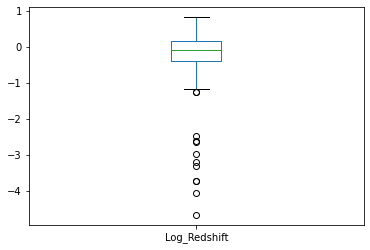

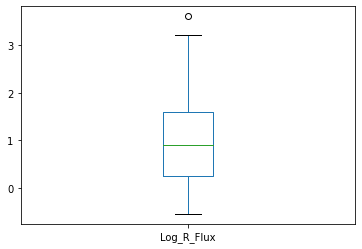

In [11]:
plot_boxplot(CLASSED_SDSS_TRAIN,"Log_Redshift")
plot_boxplot(CLASSED_SDSS_TRAIN,"Log_R_Flux")

377
469
[[-0.02465673  0.30875566  0.94086945 ...  0.08209151  0.00122062
  -0.03197666]
 [-0.07280057  0.93695248  0.28032456 ...  0.12967383  0.11554343
  -0.08329993]
 [-0.02488397  0.14378347  0.98881069 ...  0.01029003 -0.00776931
  -0.02803998]
 ...
 [-0.07276271  0.8447998   0.506672   ...  0.08323074  0.02208818
  -0.07113573]
 [-0.03280006  0.15693246  0.98546695 ...  0.01982834 -0.01099677
  -0.03624056]
 [-0.00773285  0.01581334  0.99916957 ...  0.03473383 -0.00543667
  -0.00831013]]


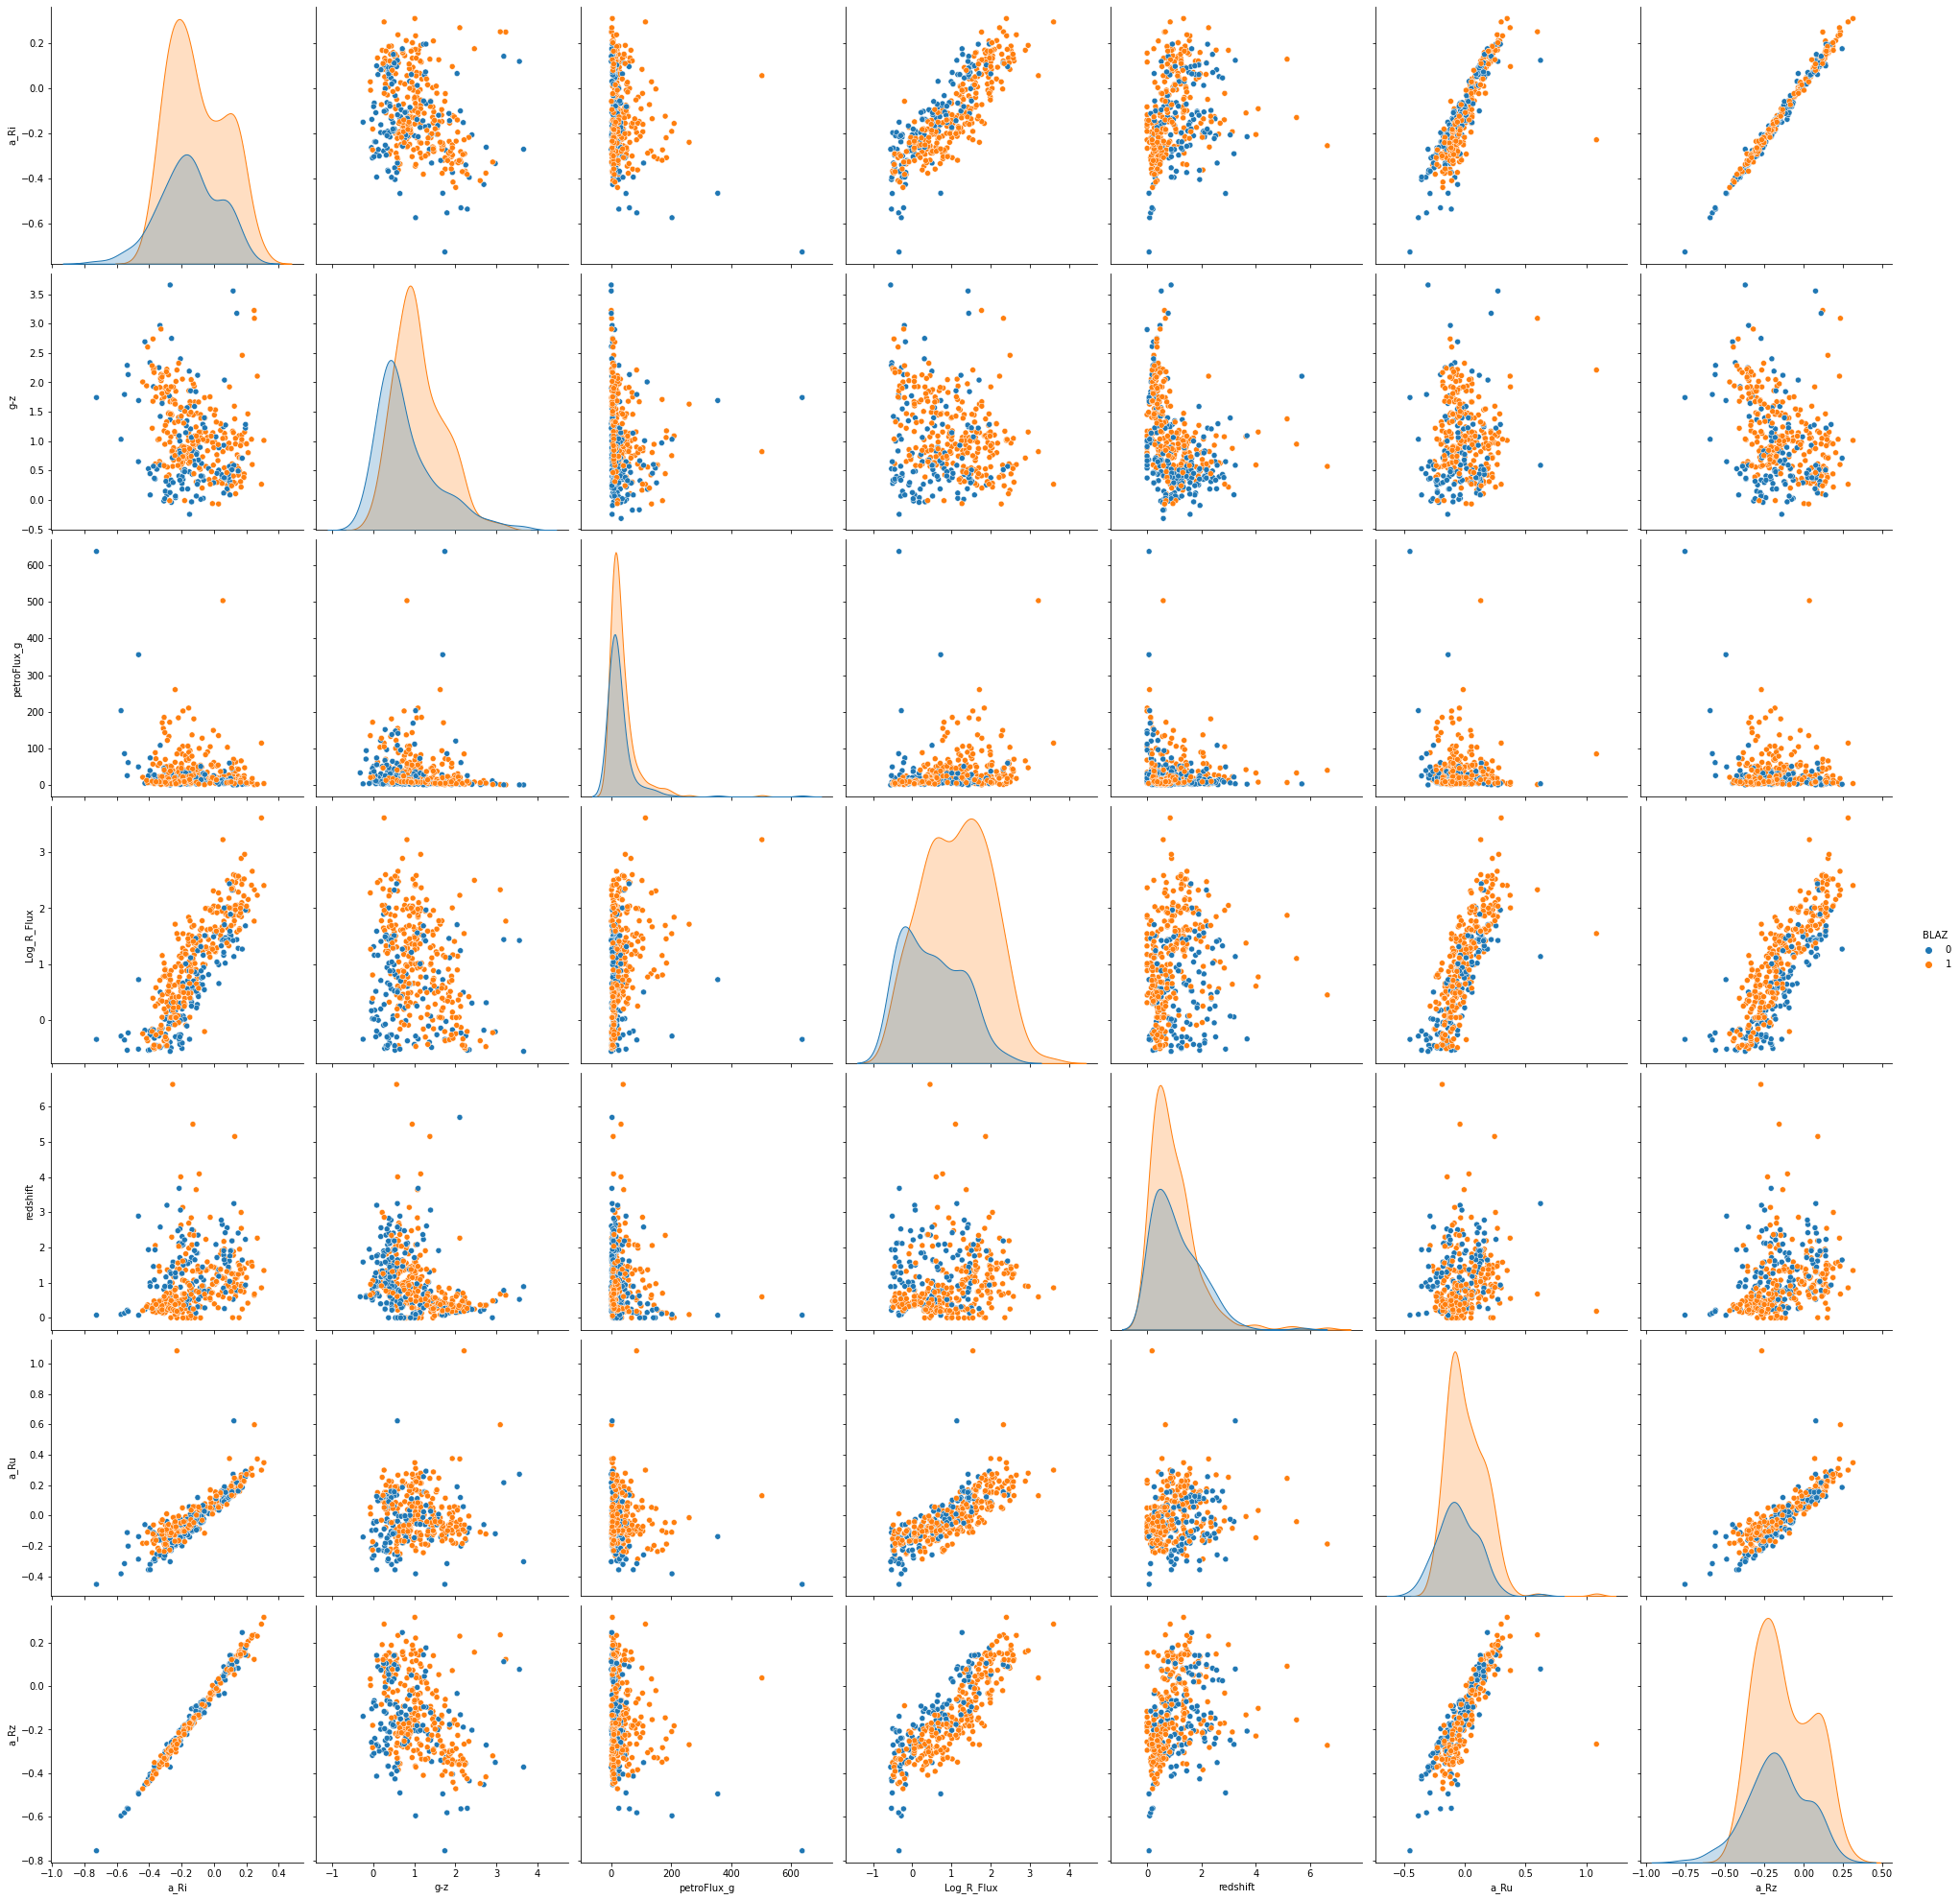

In [12]:
ug2 = (CLASSED_SDSS_NOXR['u-g'])
gz2 = (CLASSED_SDSS_NOXR['g-z'])
#CLASSED_SDSS = CLASSED_SDSS[CLASSED_SDSS['BLAZ']==1]
print(len(CLASSED_SDSS_NOXR))

##trying out a few variables in the DF
#frame_sns = pd.DataFrame(CLASSED_SDSS,columns=['a_Rr','a_Rg','a_Rz','a_Ru','a_ru','a_gu','Log_Redshift'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
#DF_NOXR = pd.DataFrame(CLASSED_SDSS_NOXR,columns=['a_Rr','a_Rg','a_Rz','a_Ru','a_ru','Log_Redshift'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
#DF_NOXR = pd.DataFrame(CLASSED_SDSS_NOXR,columns=['u','r','g','i','z'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
DF_NOXR = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['a_Ri','g-z','petroFlux_g','Log_R_Flux','redshift','a_Ru','a_Rz','BLAZ'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['a_Ri','g-z','petroFlux_g','Log_R_Flux','redshift','a_Ru','a_Rz',] )#'u-g','g-z','Log_Redshift','Log_R_Flux',

#print(DF_NOXR.values)
#display(DF_NOXR)
imputed_NOXR = mice(DF_NOXR_2.values)

normalized_NOXR = preprocessing.normalize(imputed_NOXR)
print(len(normalized_NOXR))
#display(imputed_NOXR)

CLASSED_SDSS_XR = CLASSED_SDSS[(CLASSED_SDSS['cat']=='BLAZXR')]
#print(len(CLASSED_SDSS_XR))
#display(CLASSED_SDSS_XR)
#DF_XR = pd.DataFrame(CLASSED_SDSS_XR,columns=['a_Rr','a_Rg','a_Rz','a_Ru','a_ru'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
#DF_XR = pd.DataFrame(CLASSED_SDSS_XR,columns=['u','r','g','i','z'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
DF_XR = pd.DataFrame(CLASSED_SDSS_XR_unmatched,columns=['a_Ri','g-z','petroFlux_g','Log_R_Flux','redshift','a_Ru','a_Rz'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',


imputed_XR = mice(DF_XR.values)
normalized_XR = preprocessing.normalize(imputed_XR)
print(normalized_XR)
#frame_sns = pd.DataFrame(CLASSED_SDSS,columns=['a_Rr','a_Rg','a_Rz','a_Ru','Log_Redshift'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
#frame_sns = pd.DataFrame(CLASSED_SDSS,columns=['a_Rr','a_Rg','a_Rz','a_Ru'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',

ug3 = (CLASSED_SDSS_TRAIN['u-g'])
gz3 = (CLASSED_SDSS_TRAIN['g-z'])
#imputed_sns = mice(frame_sns.values)
#display(imputed_sns)
#xy_train = np.vstack ((u,g,r,i,z,R_flux)).T
xy_train = np.vstack ((ug,gz,Redshift,R)).T
import seaborn as sns
#sns.pairplot(CLASSED_SDSS, height = 4,hue='Classification')
sns.pairplot(DF_NOXR, height = 4, hue='BLAZ')

#display(df)

#df = pd.melt(DF_NOXR, DF_NOXR.columns[-1], DF_NOXR.columns[:-1])
# g = sns.FacetGrid(df, col="variable", hue="BLAZ", col_wrap=4,height=4)
# g.map(sns.kdeplot, "value", shade=True)
# g.set_titles("{col_name}")  # use this argument literally
# g.set_axis_labels(x_var='Spectral slope', y_var="density")
# plt.show()




#xy_train
#sns.kdeplot(x=CLASSED_SDSS.g-z,hue=CLASSED_SDSS['BLAZ'],multiple='stack')
#sns.kdeplot(CLASSED_SDSS.sky_g)


In [13]:
from scipy import stats


In [14]:
for column in DF_NOXR:
    ks = stats.kstest(DF_NOXR[column],'norm')
    print(ks,DF_NOXR[column].name)

KstestResult(statistic=nan, pvalue=nan) a_Ri
KstestResult(statistic=0.5094927579782949, pvalue=2.064457030526101e-113) g-z
KstestResult(statistic=0.9477497175377855, pvalue=0.0) petroFlux_g
KstestResult(statistic=nan, pvalue=nan) Log_R_Flux
KstestResult(statistic=nan, pvalue=nan) redshift
KstestResult(statistic=nan, pvalue=nan) a_Ru
KstestResult(statistic=nan, pvalue=nan) a_Rz
KstestResult(statistic=0.5, pvalue=6.033723504835318e-109) BLAZ


In [15]:
#mode  = CLASSED_SDSS.loc[CLASSED_SDSS['BLAZ'] == 1]
mode  = CLASSED_SDSS_TRAIN['BLAZ'] 
#modal = 
len(mode.values)

#mode = CLASSED_SDSS['BLAZ']
#xy_train[80]
#CLASSED_SDSS.specobjid
#xy_train

469

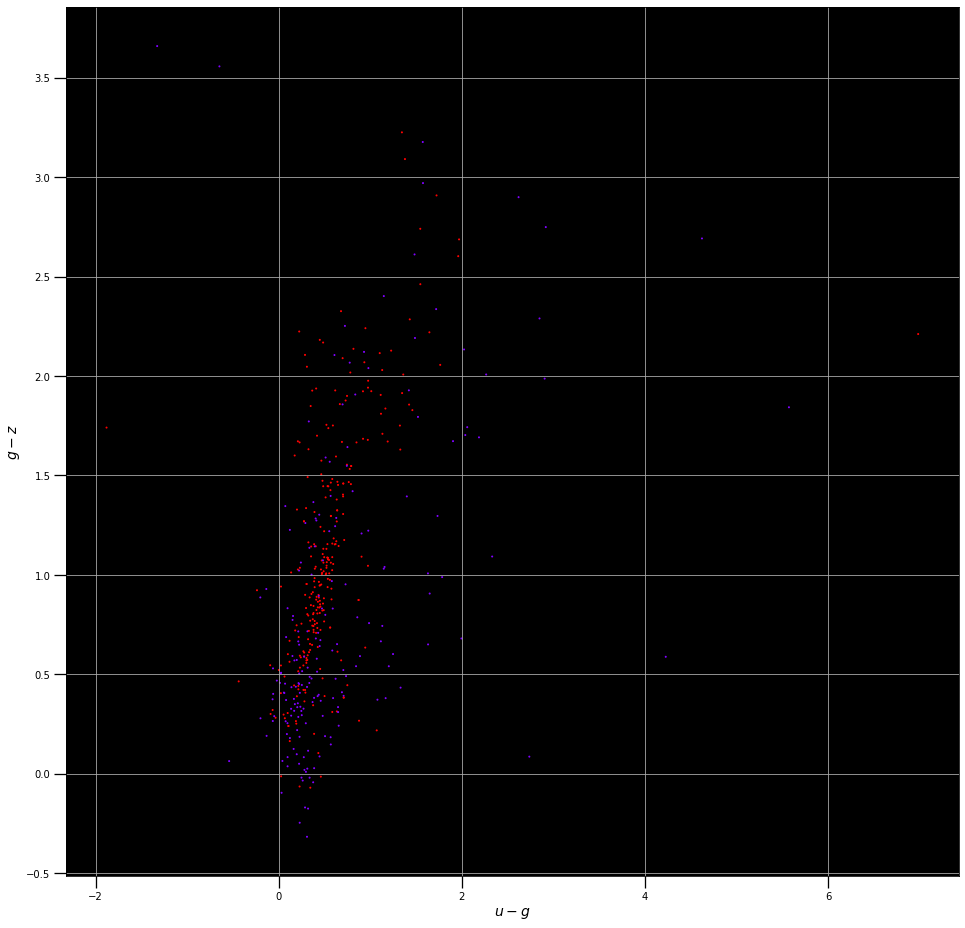

In [16]:
fig0 = plt.figure(figsize=(16,16))
ax2 = fig0.add_subplot(111) 
ax2.set_facecolor('xkcd:black')

#plt.scatter(u-g,g-z,s=1,c=mode,cmap= 'rainbow')
plt.scatter(ug3,gz3,s=1,c=mode,cmap= 'rainbow')

plt.grid('on')

plt.xlabel('$u-g$', fontsize=14)
plt.ylabel('$g-z$', fontsize=14)
plt.tick_params('both', length=12, width=1.3, which='major')

plt.show()

In [17]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, plot_precision_recall_curve

In [18]:
#x_train,x_test,y_train,y_test = train_test_split(DF_NOXR.values,mode,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(imputed_NOXR,mode,random_state=0,test_size=0.10)

#gnb = GaussianNB()
#gnb.fit(x_train,y_train)
#y_pred = gnb.predict(x_test)
#acc_gnb_split = accuracy_score(y_test,y_pred)
#scores = cross_val_score(gnb,x_train,y_train, cv =4)
svm = SVC(kernel='rbf',gamma = 'auto', class_weight='balanced', probability=True)
# svm.fit(xy_train,mode)
svm.fit(x_train,y_train)

#class_pred_svm = svm.predict(imputed_sns)
class_pred_svm = svm.predict(x_test)
print(accuracy_score(class_pred_svm,y_test))
#print(svm.predict_proba([xy_train[800]]))
#print(len(class_pred_svm))
list1 = class_pred_svm.tolist()
#list1
#NEW_XR = CLASSED_SDSS[CLASSED_SDSS['cat']=='BLAZXR']
#CLASSED_SDSS_NOXR['svm'] = list1
#len(class_pred_svm)
#class_pred_svm
#print(len(CLASSED_SDSS_XR.loc[CLASSED_SDSS_XR['svm'] == 1]))
#display(CLASSED_SDSS_NOXR)

0.6170212765957447


0.6808510638297872 [0.54716981 0.64150943 0.56190476 0.60952381]


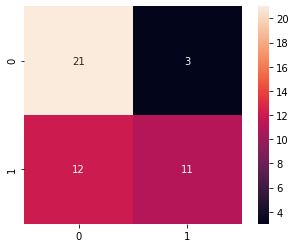

In [19]:
gnb = GaussianNB()
#gnb.fit(xy_train,mode)
#gnb.fit(imputed_sns,mode)

#class_pred_gnb = gnb.predict(xy_train)
#class_pred_gnb = gnb.predict(imputed_sns)

#CLASSED_SDSS['gnb'] = list2
#print(len(CLASSED_SDSS.loc[CLASSED_SDSS['gnb'] == 1]))
#_train,x_test,y_train,y_test = train_test_split(xy_train,mode,random_state=0 ,train_size=0.1)
#x_train,x_test,y_train,y_test = train_test_split(imputed_sns,mode,random_state=0 ,train_size=0.2)
#x_train,x_test,y_train,y_test = train_test_split(normalized_NOXR,mode,random_state=0 ,train_size=0.2)


gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
acc_gnb_split = accuracy_score(y_test,y_pred)
scores = cross_val_score(gnb,x_train,y_train, cv =4)
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,square=True,annot=True)
#y_pred
print(acc_gnb_split,scores)

#why is Gnb getting it perfect?


In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(imputed_NOXR,mode)
pred_lda = lda.predict(imputed_NOXR)
list3 = pred_lda.tolist()
#CLASSED_SDSS['lda'] = list3
#print(len(CLASSED_SDSS.loc[CLASSED_SDSS['lda'] == 1]))
acc_lda = accuracy_score(mode,pred_lda)
print(acc_lda)
#scores_lda = cross_val_score(pred_lda,mode, cv =5)
#print(acc_lda,scores)
#display(CLASSED_SDSS)

0.7292110874200426


In [21]:
knc = KNeighborsClassifier(3)
knc.fit(normalized_NOXR,mode)
pred_knc = knc.predict(normalized_NOXR)
#pred_knc_2 = knc.predict(imputed_XR)

list4 = pred_knc.tolist()
acc_knc = accuracy_score(mode,pred_knc)
#print(acc_knc,len(pred_knc_2==1))
acc_knc
#CLASSED_SDSS['knc'] = list4
#print(len(CLASSED_SDSS.loc[CLASSED_SDSS['knc'] == 1]))

0.8550106609808102

In [22]:
knc = KNeighborsClassifier(2)
knc.fit(x_train,y_train)
pred_knc_2 = knc.predict(x_test)
#pred_knc_2 = knc.predict(imputed_XR)

list4 = pred_knc.tolist()
acc_knc = accuracy_score(y_test,pred_knc_2)
acc_knc


0.5957446808510638

In [23]:
# fig0 = plt.figure(figsize=(16,16))
# ax2 = fig0.add_subplot(111) 
# ax2.set_facecolor('xkcd:black')

# plt.scatter(ug2,gz2,s=5,c=pred_knc,cmap= 'rainbow')
# plt.grid('on')

# fig0 = plt.figure(figsize=(16,16))
# ax2 = fig0.add_subplot(111) 
# ax2.set_facecolor('xkcd:black')

# # plt.scatter(u-g,g-z,s=5,c=class_pred_gnb,cmap= 'rainbow')
# # plt.grid('on')

# # plt.xlabel('$u-g$', fontsize=14)
# # plt.ylabel('$g-z$', fontsize=14)
# # plt.tick_params('both', length=12, width=1.3, which='major')

# # plt.show()

In [24]:
acc = accuracy_score(class_pred_svm,y_test)
print(acc)


0.6170212765957447


In [25]:
cm = confusion_matrix(y_test,class_pred_svm)
import seaborn as sns


0.6170212765957447 0.6


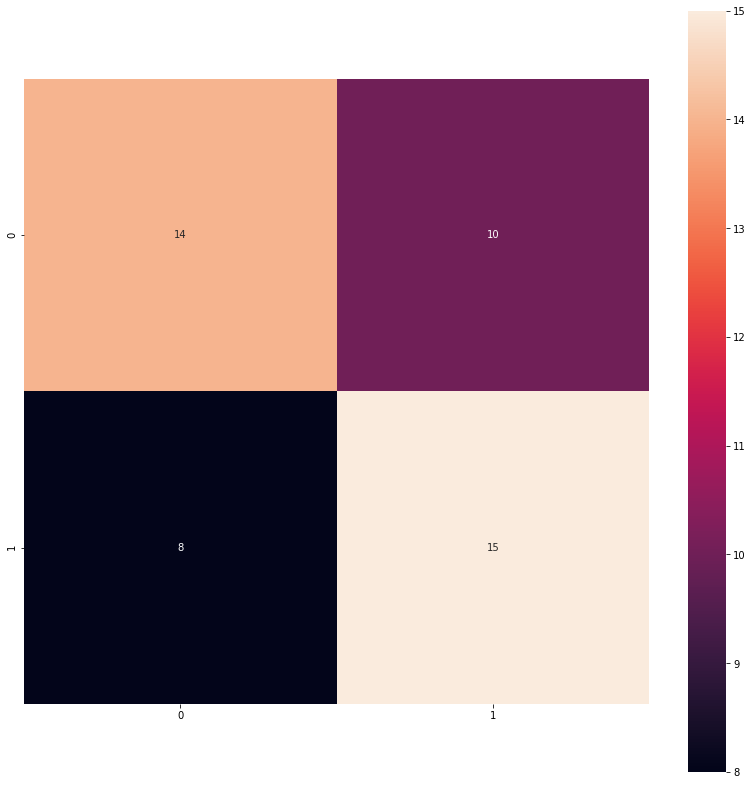

In [26]:
fig1 = plt.figure(figsize=(14,14))
# plt.xlim(0,2)
# plt.xlim(2,-1)
sns.heatmap(cm,square= True,annot=True,cbar=True)
tp,tn,fp,fn = cm[1,1],cm[0,0],cm[0,1],cm[1,0]
efficiency = (tp+tn)/ (tp+tn+fp+fn)
completness = (tp)/(fp+tp)
print(efficiency,completness)

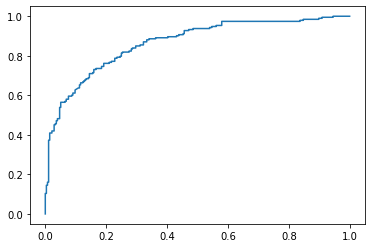

In [27]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
svm_prob = svm.predict_proba(imputed_NOXR)
#print(svm_prob)
prob , rec, thresh = precision_recall_curve(mode ,svm_prob[:,0])
tprob , trec, tthresh = roc_curve(mode, svm_prob[:,0])
plt.plot(trec,tprob)
#plt.plot(rec,prob)

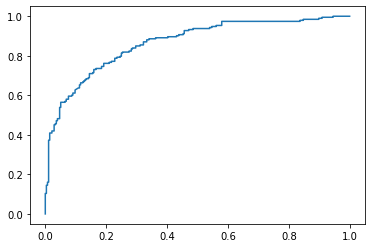

In [28]:
#disp = plot_precision_recall_curve(svm,xy_train,mode)
plt.plot(trec,tprob)